<a href="https://colab.research.google.com/github/laihowo/Fruit_Vision/blob/main/Decayed_Fruit_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Image Classification of Fruit Using CNN**

## **1. Data Acquisition**
**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Downloading the dataset**

The data is downloaded, and stored as files.

In [ ]:
import os
data_path = 'Computer Vision Final Project Files'
data_id = '1MvFh5lFdb7aDawB2fUxkh7VOT07-8LTw'
if not os.path.exists(data_path):
  !gdown $data_id
  !unzip -q $data_path

## **2. Data Preprocessing**

### **Image Augmentations**
- Synthesising the training data

**ImageDataGenerator()**
- Generates batches of tensor image data with real-time data augmentation.

In [ ]:
# ImageDataGenerator class
# - rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
# - shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
# - zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1 - zoom_range, 1 + zoom_range].
# - horizontal_flip: Boolean. Randomly flip inputs horizontally.
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

**.flow_from_directory()**
- Takes the path to a directory & generates batches of augmented data.

In [ ]:
from keras.src.layers.rnn.time_distributed import TimeDistributed
# flow_from_directory method
# - directory: string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator.
    # Directory’s name is taken as the label of all the images present in it.
    # For example : All the images inside the ‘cats’ named folder will be considered as cats by keras.
# - target_size: Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.
# - batch_size: Size of the batches of data (default: 32).
# - class_mode: One of "categorical", "binary", "sparse", "input", or None.
    # Determines the type of label arrays that are returned.
    # "binary" will be 1D binary labels.
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='binary')

Found 0 images belonging to 6 classes.
Found 150 images belonging to 6 classes.


## **3. Model Building & Training**

### **Creating and Training the Model**

We can build the neural network and train and evaluate the model with data in the feature layer. In the code below we are building one of the most common types of models called a **sequential model**. This is a stack of layers starting with the feature layer.

**i) Importing A Model**

In [ ]:
from keras.models import Sequential

**ii) Instantiation**

In [ ]:
classifier = Sequential()

**iii) Adding Layers**

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Step 1 - Convolution Layer

In [ ]:
# get picture size (resolution)
from keras.preprocessing import image
from os import listdir

file_names = []
for dir in listdir(train_path):
  for file in listdir(train_path + dir):
    file_names.append(file)

sample = np.random.choice(file_names)
folder_name = sample.split('.')[0] + 's'
img = image.load_img(f'{train_path}{folder_name}/{sample}')
width, height = img.size
print(width, height)

309 499


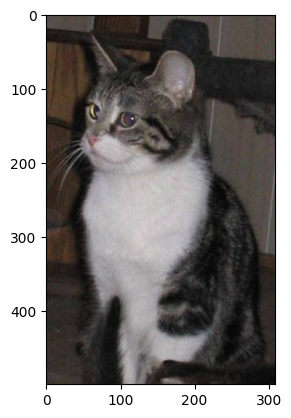

In [ ]:
# original image
plt.imshow(img)

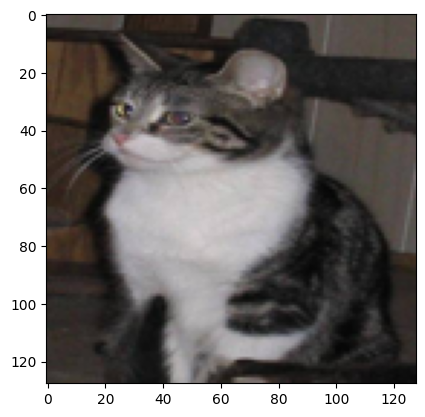

In [ ]:
# image after resizing
img = img.resize((128,128))
plt.imshow(img)

In [ ]:
# images: 2 Dimensional arrays -> Convolution 2-D
# videos: Convolution 3-D -> the third dimension will be time

# 4 arguments:
# 1st: number of filters i.e 32
# 2nd: shape each filter is going to be -> 3x3
# 3rd: input shape and type of image(RGB or Black and White) of each image
#  -> the input image our CNN is going to be taking is of a 128x128 resolution
#  -> '3' stands for RGB, which is a colour imgage
# 4th: activation function -> 'relu' stands for a rectifier function
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))

Step 2 - Pooling Layer
- Reducing the size of the images as much as possible

In [ ]:
# different types of pooling operations like Max Pooling, Min Pooling
# In MaxPooling we need the maximum value pixel from the respective region of interest.
# 2x2 matrix: have minimum pixel loss and get a precise region where the features are located.
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Step 3 - Flatten Layer
- Converting all the pooled images into a continuous vector

In [ ]:
# take the 2-D array(pooled image pixels) and convert them to a one dimensional single vector
classifier.add(Flatten())

Step 4 - Fully Connected Layer (Hidden Layer)

- Connecting the set of nodes got after the flattening step

In [ ]:
# As this layer will be present between the input layer and output layer, we can refer to it as a hidden layer.
# Dense: the function to add a fully connected layer
# units: define the number of nodes that should be present in this hidden layer
# -> These units' value will be always between the number of input nodes and the output nodes but the art of choosing the most optimal number of nodes can be achieved only through experimental tries.
# -> It’s a common practice to use a power of 2.
# activation function: a rectifier function
classifier.add(Dense(units=128, activation='relu'))

Step 5 - Output Layer

**Sigmoid Activation Function**
- Also called logistic function.
- Limits the output to a range between 0 and 1, making these functions useful in the prediction of probabilities.

In [ ]:
# output layer (final layer) should contain only one node, as it is binary classification.
# This single node will give us a binary output of either a Cat or Dog.
classifier.add(Dense(units=1, activation='sigmoid'))

**iv) Compiling the model**

**Adam**

*   Optimizer that implements the Adam algorithm.
*   Adam optimization is a **stochastic gradient descent** method that is based on adaptive estimation of first-order and second-order moments.





In [ ]:
# Loss parameter: to choose the loss function -> Binary crossentropy: Used for binary decisions
# Metrics parameter: to choose the performance metric -> Accuracy: What percentage of predictions are correct
from keras.optimizers import Adam
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**v) Model fitting**
- Fitting the CNN to the images

**.fit_generator()**
*   Trains the model on data generated batch-by-batch by a Python generator


In [ ]:
# fit_generator method instead of fit: used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
# 'steps_per_epoch': Total number of steps (batches of samples) to yield from 'generator' before declaring one epoch finished and starting the next epoch.
# 'epochs': A single epoch is a single step in training a neural network; in other words when a neural network is trained on every training sample only in one pass we say that one epoch is finished. So the training process should consist of more than one epoch.

# .fit_generator() makes assumptions:
#  1. Keras calls the generator function (dataAugmentaion)
#  2. Generator function (dataAugmentaion) provides a batch_size of 32 to fit_generator() function.
#  3. .fit_generator() function first accepts a batch of the dataset, then performs backpropagation on it, and then updates the weights in our model.
#  4. For the number of epochs specified (10 in our case) the process is repeated.
classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         epochs=5, # larger -> higher accuracy
                         validation_data=test_set,
                         validation_steps=len(test_set))

<ipython-input-46-328fe662dceb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/5
63/63 [==============================] - 58s 899ms/step - loss: 0.7256 - accuracy: 0.5535 - val_loss: 0.6799 - val_accuracy: 0.5780
Epoch 2/5
63/63 [==============================] - 54s 859ms/step - loss: 0.6645 - accuracy: 0.6070 - val_loss: 0.7103 - val_accuracy: 0.5530
Epoch 3/5
63/63 [==============================] - 59s 937ms/step - loss: 0.6611 - accuracy: 0.6095 - val_loss: 0.6484 - val_accuracy: 0.6340
Epoch 4/5
63/63 [==============================] - 55s 857ms/step - loss: 0.6461 - accuracy: 0.6285 - val_loss: 0.6482 - val_accuracy: 0.6210
Epoch 5/5
63/63 [==============================] - 54s 867ms/step - loss: 0.6202 - accuracy: 0.6630 - val_loss: 0.6330 - val_accuracy: 0.6650


## **4. Model Prediction & Evaluation**

### **Prediction**

In [ ]:
# prepare the image to be sent into the model by converting its resolution to 128x128 as the model only accepts that resolution.
from keras.preprocessing import image
test_image = image.load_img(test_path+'/.jpg', target_size=(128, 128))

# expanding dimension
test_image = image.img_to_array(test_image)
print(test_image.shape)

test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

# predicting result
result = classifier.predict(test_image)
print(result)

# Show the category
# 1: dog
# 0: cat
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

(128, 128, 3)
(1, 128, 128, 3)
1/1 [==============================] - 0s 32ms/step
[[1.]]
dog


### **Evaluation**

**.evaluate_generator()**
- Evaluates the model on a data generator.

In [ ]:
loss, acc = classifier.evaluate_generator(test_set)

<ipython-input-48-cdbb5048161a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = classifier.evaluate_generator(test_set)


In [ ]:
loss

0.6330122947692871

In [ ]:
acc

0.6650000214576721

# **Prediction From Random Photos**

1/1 [==============================] - 0s 24ms/step
cat


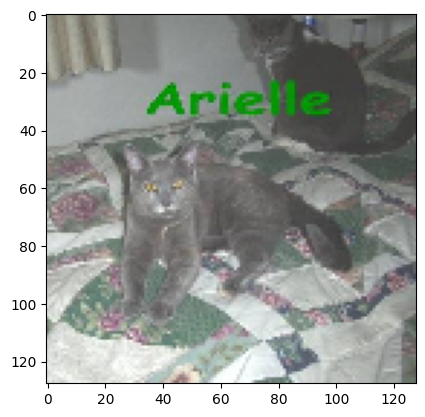

In [ ]:
# Randomly choose one image from the folder and show it
from keras.preprocessing import image

sample = np.random.choice(file_names)
folder_name = sample.split('.')[0] + 's'

# show the image
test_image = image.load_img(f'{train_path}{folder_name}/{sample}', target_size=(128, 128))
plt.imshow(test_image)

# expanding dimension
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# predicting result
result = classifier.predict(test_image)

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)